In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import utils


SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 



  0%|          | 0/1000 [00:00<?, ?it/s]/Users/maunu/Library/CloudStorage/GoogleDrive-maunu@brandeis.edu/My Drive/Code/Python/Graphs/Laplacians/utils.py:156: RuntimeWarning: divide by zero encountered in log
  Ai = np.log(Ai)+step * grad/np.sqrt(1)
100%|██████████| 1000/1000 [00:07<00:00, 132.06it/s]


(5, 5, 1000)


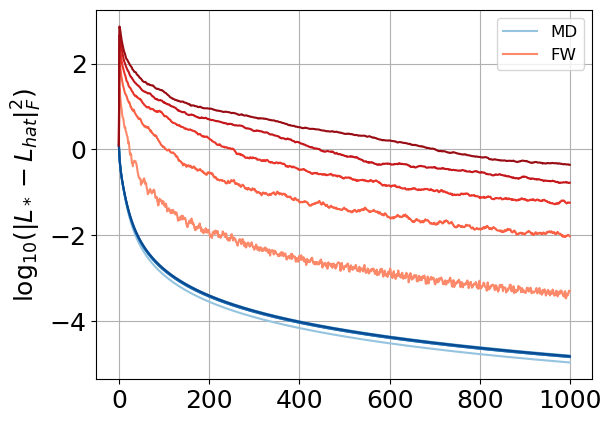

In [2]:
# set parameters
ns = [10, 20, 30, 40, 50]
k = 2
p = 0.95
q = 0.05
T = 1
niter = 1000
reps = 5
opt = 'sbm'

convfw = np.zeros((len(ns), reps, niter))
convmd = np.zeros((len(ns), reps, niter))
timesfw = np.zeros((len(ns), reps, niter))
timesmd = np.zeros((len(ns), reps, niter))

for i in range(len(ns)):
    for j in range(reps):
        n = ns[i]
        m = 2 * n ** 2

        # create random Laplacian matrix
        L = utils.create_graph_lap(n, k, p, q, opt)
        L = L / np.trace(L) * T

        X = np.random.normal(0,1,(m, n))
        Y = np.sum((X @ L) * X, axis = 1)

        _, cfw, tfw = utils.lap_recover(X, Y, T, L, niter, opt = 'fw', step = 1, copt = 'BW', ls = False)
        _, cmd, tmd = utils.lap_recover(X, Y, T, L, niter, opt = 'md', step = .1, copt = 'BW')
        convfw[i, j, :] = cfw
        convmd[i, j, :] = cmd
        timesfw[i, j, :] = tfw
        timesmd[i, j, :] = tmd


print(convfw.shape)

plt.figure()
colorsred = plt.cm.Reds(np.linspace(0.4, .9, len(ns)))
colorsblue = plt.cm.Blues(np.linspace(0.4, .9, len(ns)))
for i in range(len(ns)):
    plt.plot(np.log10(np.mean(convmd[i], axis = 0)).T, c = colorsblue[i])
    plt.plot(np.log10(np.mean(convfw[i], axis = 0)).T, c = colorsred[i])
# plt.plot(timesmd.T, np.log10(convmd).T, 'r', cmap = 'Blues')
# plt.plot(timesfw.T, np.log10(convfw).T, 'b', cmap = 'Reds')
plt.legend(['MD', 'FW'])
plt.ylabel(r'$\log_{10}(\|L_* - L_{hat}\|_{F}^{2})$')
plt.grid()
plt.savefig('lap_rec_bw_test_1.png', dpi = 300, bbox_inches='tight')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/maunu/Library/CloudStorage/GoogleDrive-maunu@brandeis.edu/My Drive/Code/Python/Graphs/Laplacians/utils.py:156: RuntimeWarning: divide by zero encountered in log
  Ai = np.log(Ai)+step * grad/np.sqrt(1)
100%|██████████| 1000/1000 [00:07<00:00, 138.59it/s]


(5, 2, 1000)


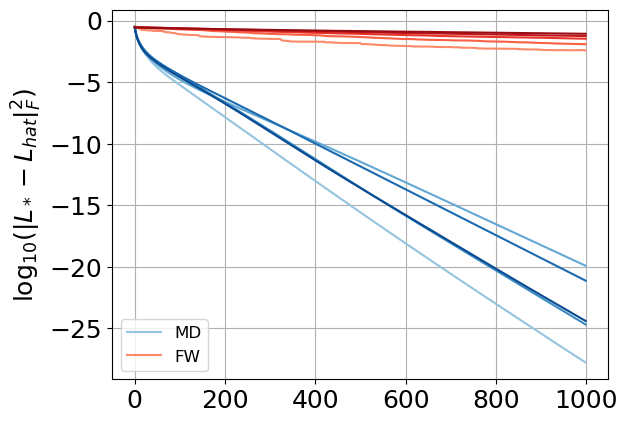

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import utils


SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 


# set parameters
ns = [10, 20, 30, 40, 50]
k = 2
p = 0.8
q = 0.2
T = 1
niter = 1000
reps = 2
opt = 'densesbm'

convfw = np.zeros((len(ns), reps, niter))
convmd = np.zeros((len(ns), reps, niter))
timesfw = np.zeros((len(ns), reps, niter))
timesmd = np.zeros((len(ns), reps, niter))

for i in range(len(ns)):
    for j in range(reps):
        n = ns[i]
        m = 2 * n ** 2

        # create random Laplacian matrix
        L = utils.create_graph_lap(n, k, p, q, opt)
        L = L / np.trace(L) * T

        X = np.random.normal(0,1,(m, n))
        Y = np.sum((X @ L) * X, axis = 1)

        _, cfw, tfw = utils.lap_recover(X, Y, T, L, niter, opt = 'fw', step = 1, copt = 'BW', ls = True)
        _, cmd, tmd = utils.lap_recover(X, Y, T, L, niter, opt = 'md', step = .1, copt = 'BW')
        convfw[i, j, :] = cfw
        convmd[i, j, :] = cmd
        timesfw[i, j, :] = tfw
        timesmd[i, j, :] = tmd


print(convfw.shape)

plt.figure()
colorsred = plt.cm.Reds(np.linspace(0.4, .9, len(ns)))
colorsblue = plt.cm.Blues(np.linspace(0.4, .9, len(ns)))
for i in range(len(ns)):
    plt.plot(np.log10(np.mean(convmd[i], axis = 0)).T, c = colorsblue[i])
    plt.plot(np.log10(np.mean(convfw[i], axis = 0)).T, c = colorsred[i])
# plt.plot(timesmd.T, np.log10(convmd).T, 'r', cmap = 'Blues')
# plt.plot(timesfw.T, np.log10(convfw).T, 'b', cmap = 'Reds')
plt.legend(['MD', 'FW'])
plt.ylabel(r'$\log_{10}(\|L_* - L_{hat}\|_{F}^{2})$')
plt.grid()
plt.savefig('lap_rec_bw_test_2.png', dpi = 300, bbox_inches='tight')
plt.show()